# Imports

In [1]:
import json

import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
data_url = 'https://raw.githubusercontent.com/ksetdekov/test_predict_ts/main/2_5350833418869411277.csv'
data = pd.read_csv(data_url)
data

,date,clients
0,1/2/2010 0:00,129.0
1,1/2/2010 1:00,148.0
2,1/2/2010 2:00,159.0
3,1/2/2010 3:00,181.0
4,1/2/2010 4:00,138.0
...,...,...
43795,NaN,NaN
43796,NaN,NaN
43797,NaN,NaN
43798,NaN,NaN


In [4]:
data.tail(30)

,date,clients
43770,12/30/2014 18:00,79.0
43771,12/30/2014 19:00,35.0
43772,12/30/2014 20:00,26.0
43773,12/30/2014 21:00,20.0
43774,12/30/2014 22:00,8.0
43775,12/30/2014 23:00,16.0
43776,NaN,NaN
43777,NaN,NaN
43778,NaN,NaN
43779,NaN,NaN


In [5]:
data.date = pd.to_datetime(data.date)

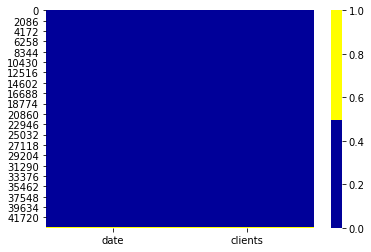

In [6]:
colors = ['#000099', '#ffff00'] 

a = sns.heatmap(data.isnull(), cmap=sns.color_palette(colors))

Визуально пропусков не подавляющее число

<AxesSubplot:>

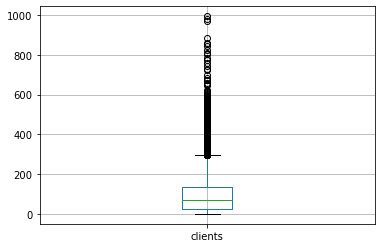

In [7]:
data.boxplot(column=['clients'])

In [8]:
data.describe()

,clients
count,43776.000000
mean,94.059553
std,92.256575
min,0.000000
25%,24.000000
50%,68.000000
75%,133.000000
max,994.000000


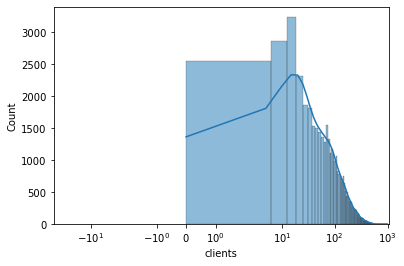

In [9]:
ax = sns.histplot(data=data, x="clients", kde=True)
ax.set_xscale('symlog')

<AxesSubplot:xlabel='clients', ylabel='Count'>

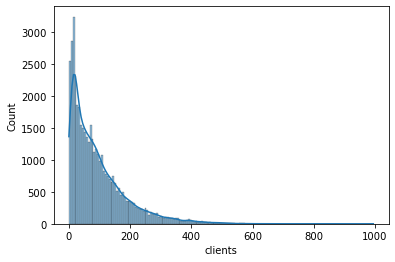

In [10]:
sns.histplot(data=data, x="clients", kde=True)

Целевая переменная с тяжелым правым хвостом, наблюдаемые значение имеют положительную ассиметрию, мода меньше среднего, все наблюдаемые значения $< 1000$.

In [11]:
misscount = data.isna().sum()
misscount[misscount>0]

date       24
clients    24
dtype: int64

Есть предположение, что 0 могуть быть пропусками, других пропусков, кроме хвоста датасета нет.

# ARIMA